In [1]:
# Import our libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [2]:
df = pd.read_csv('./us_crimes.csv')
df = df[df['State'] != 'United States']
df2 = df[df['State'] == 'Alabama']
df2 = df2.drop(columns=['State'])
df.head()
df2.head()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [3]:
df.isnull().sum()

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64

In [4]:
print(df.shape)

(3055, 21)


In [5]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." %n_dupes)

Number of duplicate rows are 0.


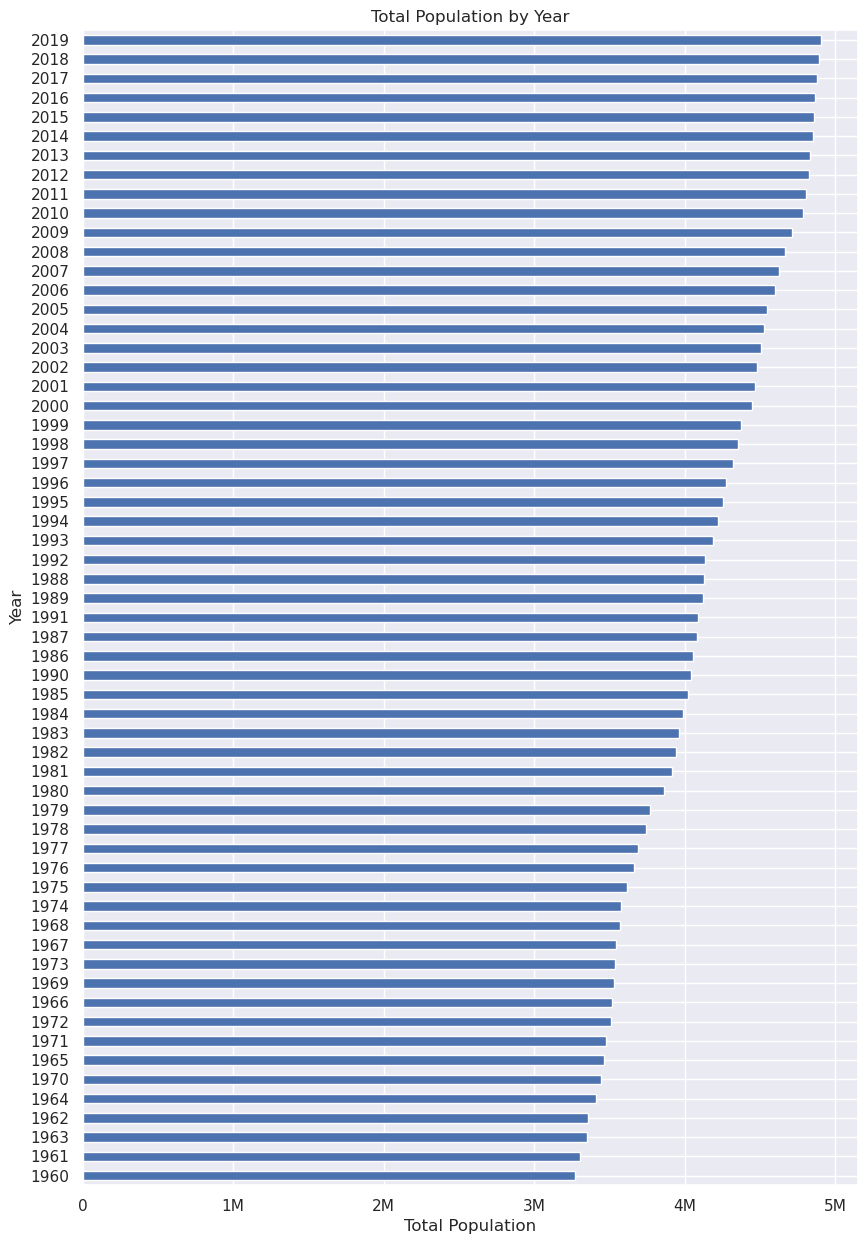

In [6]:
gb = df2.groupby('Year')['Data.Population'].sum()
plt.figure(figsize=(10,15))
gb = gb.sort_values(ascending=True)
gb.plot(kind='barh')
plt.xlabel('Total Population')
plt.ylabel('Year')
plt.title('Total Population by Year')

def custom_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{int(x/1e6)}M'

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))
plt.show()


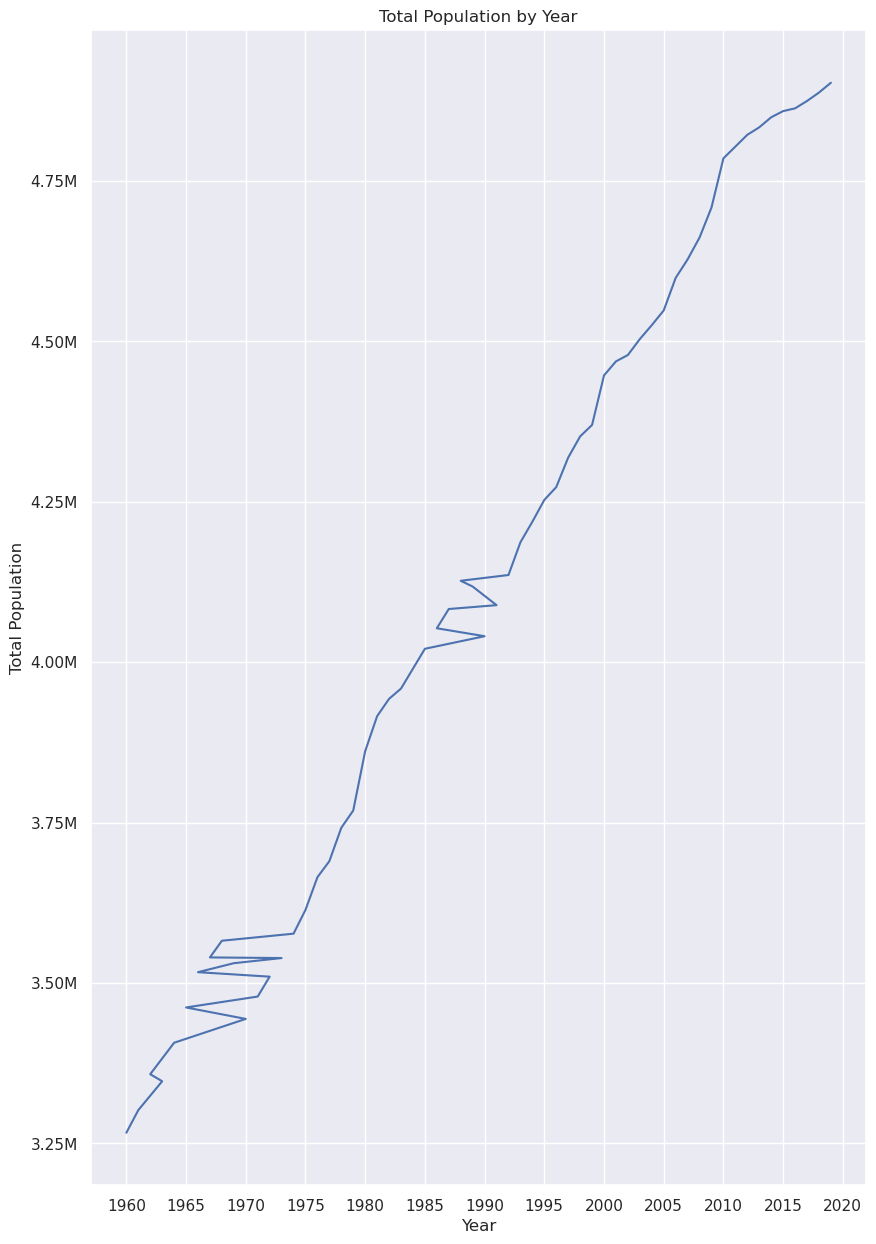

In [12]:
plt.figure(figsize=(10, 15))
gb.plot()

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population by Year')

years_to_show = range(gb.index.min(), gb.index.max() + 5, 5)
plt.xticks(years_to_show)

def custom_formatter(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x/1e6:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))